# Data Cleaning
###### By Jillian Warburton

In [1]:
# import libraries
import pandas as pd
import numpy as np
import re # for RegEx on columns
import functools as ft #for reducing 7 merges to one

## Import the Data

In [2]:
broadband = pd.read_csv("broadband.csv", sep ='\t') 
education = pd.read_csv("education_expenditures.csv", sep ='\t')
gini = pd.read_csv("gini_index.csv", sep ='\t')
infant = pd.read_csv("infant_mortality.csv", sep ='\t')
internet = pd.read_csv("internet_users.csv", sep ='\t')
maternal = pd.read_csv("maternal_mortality.csv", sep ='\t')
unemployment = pd.read_csv("unemployment.csv", sep ='\t')

In [3]:
dfs = [broadband, education, gini, infant, internet, maternal, unemployment]

In [4]:
# change all 'Date of Information' columns to 'date_of_info' with dtype int64
for df in dfs:
    df.rename(columns = {'Date of Information':'date_of_info'}, inplace = True)
    df['date_of_info'] = df['date_of_info'].str.replace(r'\D+', '', regex=True).apply(pd.to_numeric)

In [5]:
# update date_of_info column in infant dataframe to say 2022
infant['date_of_info'].fillna(value=2022, inplace=True)

In [6]:
# add column name for broadband, gini, and internet
broadband.rename(columns = {'Unnamed: 2':'broadband_users'}, inplace = True)
gini.rename(columns = {'Unnamed: 2':'gini_index'}, inplace = True)
internet.rename(columns = {'Unnamed: 2':'internet_users'}, inplace = True)

In [7]:
# change column name for education, infant, maternal, and unemployment
education.rename(columns = {'% of GDP':'percent_education_of_gdp'}, inplace = True)
infant.rename(columns = {'deaths/1,000 live births':'infant_deaths_per_1K_births'}, inplace = True)
maternal.rename(columns = {'deaths/100,000 live births':'maternal_deaths_per100Kbirths'}, inplace = True)
unemployment.rename(columns = {'%':'percent_labor_force_unemployed'}, inplace = True)

In [8]:
# remove commas from numbers in variable columns
broadband['broadband_users'] = broadband['broadband_users'].apply(lambda x : x.replace(',','')).apply(pd.to_numeric)
internet['internet_users'] = internet['internet_users'].apply(lambda x : x.replace(',','')).apply(pd.to_numeric)
maternal['maternal_deaths_per100Kbirths'] = maternal['maternal_deaths_per100Kbirths'].apply(lambda x : x.replace(',','')).apply(pd.to_numeric)

In [9]:
# rename date_of_info and Rank columns to have suffix of dataframe letter
broadband.rename(columns = {'date_of_info':'date_of_info_b','Rank':'Rank_b'}, inplace = True)
education.rename(columns = {'date_of_info':'date_of_info_e','Rank':'Rank_e'}, inplace = True)
gini.rename(columns = {'date_of_info':'date_of_info_g','Rank':'Rank_g'}, inplace = True)
infant.rename(columns = {'date_of_info':'date_of_info_i','Rank':'Rank_i'}, inplace = True)
internet.rename(columns = {'date_of_info':'date_of_info_n','Rank':'Rank_n'}, inplace = True)
maternal.rename(columns = {'date_of_info':'date_of_info_m','Rank':'Rank_m'}, inplace = True)
unemployment.rename(columns = {'date_of_info':'date_of_info_u','Rank':'Rank_u'}, inplace = True)

In [10]:
# using functools.reduce merge all data on "country" for one dataframe
factbook = ft.reduce(lambda left, right: pd.merge(left, right, on='Country', how='outer'), dfs)
# rearrange the dataframe columns by column name
factbook = factbook[['Country', 'Rank_b', 'date_of_info_b', 'broadband_users', 
                           'Rank_e', 'date_of_info_e', 'percent_education_of_gdp', 
                           'Rank_g', 'date_of_info_g', 'gini_index',
                           'Rank_i', 'date_of_info_i','infant_deaths_per_1K_births', 
                           'Rank_n', 'date_of_info_n', 'internet_users',
                           'Rank_m', 'date_of_info_m', 'maternal_deaths_per100Kbirths',
                           'Rank_u', 'date_of_info_u', 'percent_labor_force_unemployed']]


In [20]:
#factbook.tail(20)

In [11]:
# check new dataframe
#factbook.isna().sum() # missing gini index ratings for 58
#factbook.shape # 235,22
pd.set_option('display.max_columns', None)
factbook

,Country,Rank_b,date_of_info_b,broadband_users,Rank_e,date_of_info_e,percent_education_of_gdp,Rank_g,date_of_info_g,gini_index,Rank_i,date_of_info_i,infant_deaths_per_1K_births,Rank_n,date_of_info_n,internet_users,Rank_m,date_of_info_m,maternal_deaths_per100Kbirths,Rank_u,date_of_info_u,percent_labor_force_unemployed
0,China,1.0,2020.0,483549500.0,133.0,2020.0,3.6,70.0,2019.0,38.2,162.0,2022.0,6.49,1.0,2020.0,987000000.0,111.0,2017.0,29.0,73.0,2021.0,4.82
1,United States,2.0,2020.0,121176000.0,40.0,2020.0,6.1,50.0,2016.0,41.1,173.0,2022.0,5.12,3.0,2020.0,301665983.0,129.0,2017.0,19.0,95.0,2021.0,5.46
2,Japan,3.0,2020.0,44000791.0,143.0,2020.0,3.4,126.0,2013.0,32.9,223.0,2022.0,1.88,7.0,2020.0,113252419.0,166.0,2017.0,5.0,30.0,2021.0,2.80
3,Brazil,4.0,2020.0,36344670.0,41.0,2019.0,6.0,14.0,2020.0,48.9,109.0,2022.0,13.11,4.0,2020.0,172173121.0,88.0,2017.0,60.0,190.0,2021.0,14.40
4,Germany,5.0,2020.0,36215303.0,87.0,2020.0,4.7,137.0,2018.0,31.7,208.0,2022.0,3.14,10.0,2020.0,74844784.0,154.0,2017.0,7.0,42.0,2021.0,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Tokelau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.0,2019.0,805.0,NaN,NaN,NaN,18.0,2015.0,2.00
231,Christmas Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.0,2016.0,790.0,NaN,NaN,NaN,NaN,NaN,NaN
232,Norfolk Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0,2016.0,612.0,NaN,NaN,NaN,NaN,NaN,NaN
233,Pitcairn Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,2022.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## Save the new data file

In [14]:
#comment out to prevent saving new file copies
#factbook.to_csv('factbook.csv')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Try filtering out the rows with more than 6 missing values
df_filtered = factbook.dropna(thresh=6, axis=0)
df_filtered

,Country,Rank_b,date_of_info_b,broadband_users,Rank_e,date_of_info_e,percent_education_of_gdp,Rank_g,date_of_info_g,gini_index,Rank_i,date_of_info_i,infant_deaths_per_1K_births,Rank_n,date_of_info_n,internet_users,Rank_m,date_of_info_m,maternal_deaths_per100Kbirths,Rank_u,date_of_info_u,percent_labor_force_unemployed
0,China,1.0,2020.0,483549500.0,133.0,2020.0,3.6,70.0,2019.0,38.2,162.0,2022.0,6.49,1.0,2020.0,987000000.0,111.0,2017.0,29.0,73.0,2021.0,4.82
1,United States,2.0,2020.0,121176000.0,40.0,2020.0,6.1,50.0,2016.0,41.1,173.0,2022.0,5.12,3.0,2020.0,301665983.0,129.0,2017.0,19.0,95.0,2021.0,5.46
2,Japan,3.0,2020.0,44000791.0,143.0,2020.0,3.4,126.0,2013.0,32.9,223.0,2022.0,1.88,7.0,2020.0,113252419.0,166.0,2017.0,5.0,30.0,2021.0,2.80
3,Brazil,4.0,2020.0,36344670.0,41.0,2019.0,6.0,14.0,2020.0,48.9,109.0,2022.0,13.11,4.0,2020.0,172173121.0,88.0,2017.0,60.0,190.0,2021.0,14.40
4,Germany,5.0,2020.0,36215303.0,87.0,2020.0,4.7,137.0,2018.0,31.7,208.0,2022.0,3.14,10.0,2020.0,74844784.0,154.0,2017.0,7.0,42.0,2021.0,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Saint Martin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.0,2022.0,6.58,212.0,2022.0,19300.0,NaN,NaN,NaN,NaN,NaN,NaN
226,Isle of Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,2022.0,4.16,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2017.0,1.10
227,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2022.0,3.94,227.0,2019.0,1029.0,NaN,NaN,NaN,146.0,2013.0,8.80
229,Niue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.0,2019.0,1292.0,NaN,NaN,NaN,173.0,2001.0,12.00


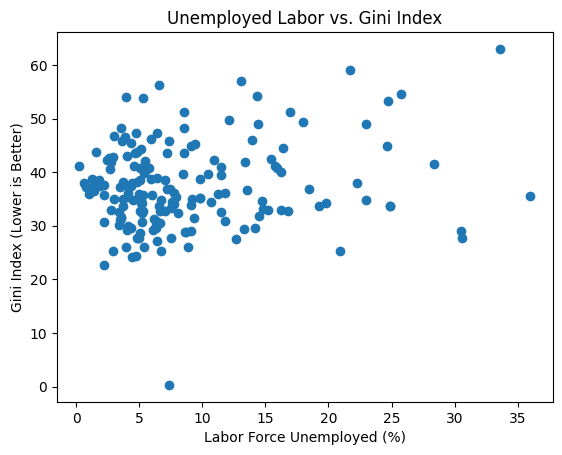

In [52]:
plt.scatter(df_filtered['percent_labor_force_unemployed'], df_filtered['gini_index'])
plt.xlabel('Labor Force Unemployed (%)')
plt.ylabel('Gini Index (Lower is Better)')
plt.title('Unemployed Labor vs. Gini Index')
#plt.savefig('C:/Users/jilli/STAT_386/my386blog/assets/images/econ.png') 
plt.show(); #to remove messages/ output label

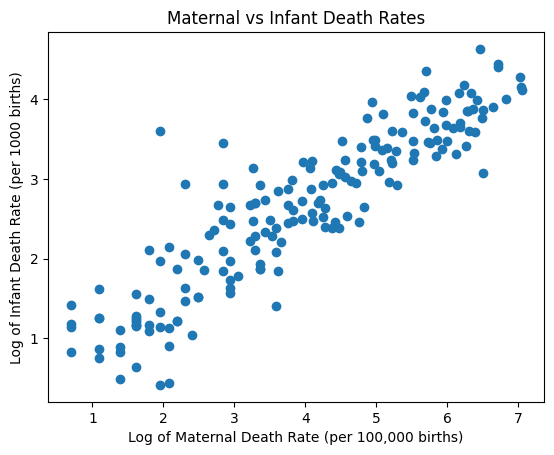

In [51]:
plt.scatter(np.log(df_filtered['maternal_deaths_per100Kbirths']), np.log(df_filtered['infant_deaths_per_1K_births']))
plt.xlabel('Log of Maternal Death Rate (per 100,000 births)')
plt.ylabel('Log of Infant Death Rate (per 1000 births)')
plt.title('Maternal vs Infant Death Rates')
#plt.savefig('C:/Users/jilli/STAT_386/my386blog/assets/images/health.png') 
plt.show(); #to remove messages/ output label

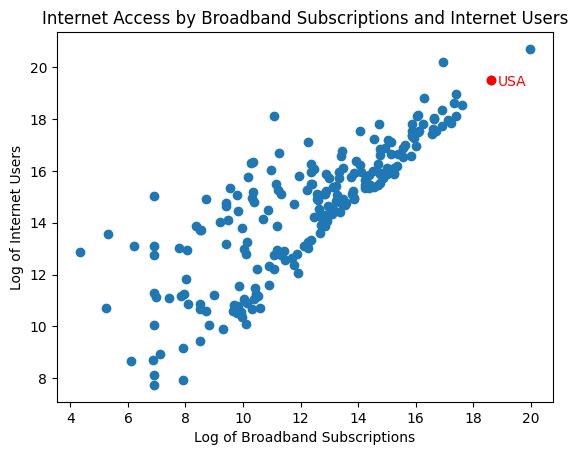

In [139]:
plt.scatter(np.log(df_filtered['broadband_users']), np.log(df_filtered['internet_users']))
plt.xlabel('Log of Broadband Subscriptions')
plt.ylabel('Log of Internet Users')
plt.title('Internet Access by Broadband Subscriptions and Internet Users')

# Annotate a specific point (in this example, the point with label 'C')
x_c = np.log(df_filtered.loc[df_filtered['Country'] == 'United States', 'broadband_users'])
y_c = np.log(df_filtered.loc[df_filtered['Country'] == 'United States', 'internet_users'])
plt.annotate('USA', xy=(x_c, y_c), xytext=(x_c+0.25, y_c-0.25), color='red')
plt.scatter(x_c, y_c, color='red')

#plt.savefig('C:/Users/jilli/STAT_386/my386blog/assets/images/internets_USA.png') 
plt.show(); #to remove messages/ output label

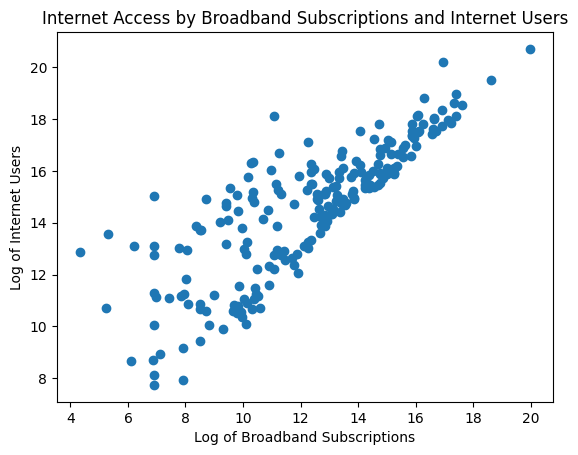

In [46]:
plt.scatter(np.log(factbook['broadband_users']), np.log(factbook['internet_users']))
plt.xlabel('Log of Broadband Subscriptions')
plt.ylabel('Log of Internet Users')
plt.title('Internet Access by Broadband Subscriptions and Internet Users')
#plt.savefig('C:/Users/jilli/STAT_386/my386blog/assets/images/internets.png') 
plt.show(); #to remove messages/ output label

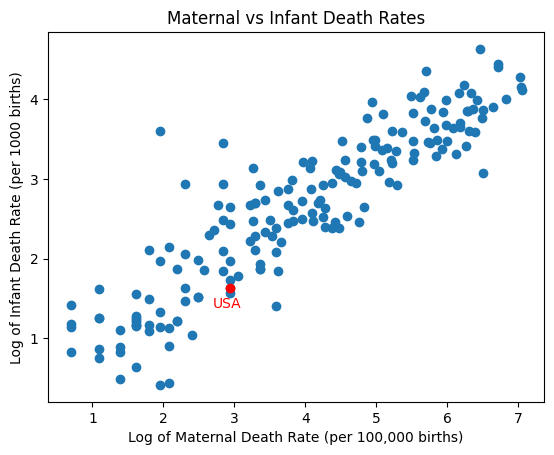

In [135]:
plt.scatter(np.log(factbook['maternal_deaths_per100Kbirths']), np.log(factbook['infant_deaths_per_1K_births']))
plt.xlabel('Log of Maternal Death Rate (per 100,000 births)')
plt.ylabel('Log of Infant Death Rate (per 1000 births)')
plt.title('Maternal vs Infant Death Rates')

# Annotate a specific point
x_c = np.log(factbook.loc[factbook['Country'] == 'United States', 'maternal_deaths_per100Kbirths'].iloc[0])
y_c = np.log(factbook.loc[factbook['Country'] == 'United States', 'infant_deaths_per_1K_births'].iloc[0])
plt.annotate('USA', xy=(x_c, y_c), xytext=(x_c - 0.25, y_c - 0.25), color='red')
plt.scatter(x_c, y_c, color='red')
#plt.savefig('C:/Users/jilli/STAT_386/my386blog/assets/images/health_USA.png') 
plt.show(); #to remove messages/ output label

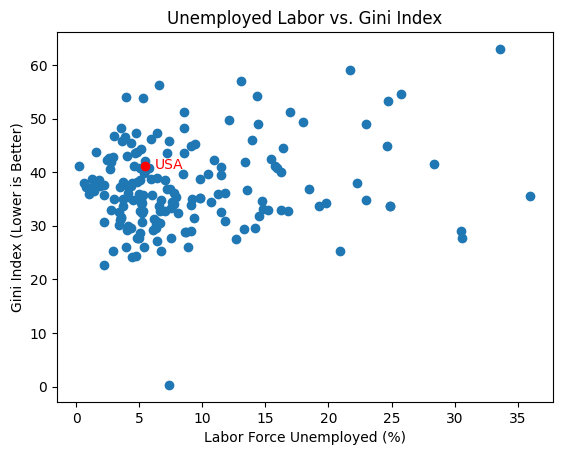

In [158]:
plt.scatter(factbook['percent_labor_force_unemployed'], factbook['gini_index'])
plt.xlabel('Labor Force Unemployed (%)')
plt.ylabel('Gini Index (Lower is Better)')
plt.title('Unemployed Labor vs. Gini Index')

# Annotate a specific point
x_c = factbook.loc[factbook['Country'] == 'United States', 'percent_labor_force_unemployed'].iloc[0]
y_c = factbook.loc[factbook['Country'] == 'United States', 'gini_index'].iloc[0]
plt.annotate('USA', xy=(x_c, y_c), xytext=(x_c + 0.75, y_c -0.5), color='red')
plt.scatter(x_c, y_c, color='red')
#plt.savefig('C:/Users/jilli/STAT_386/my386blog/assets/images/econ_USA.png') 
plt.show(); #to remove messages/ output label

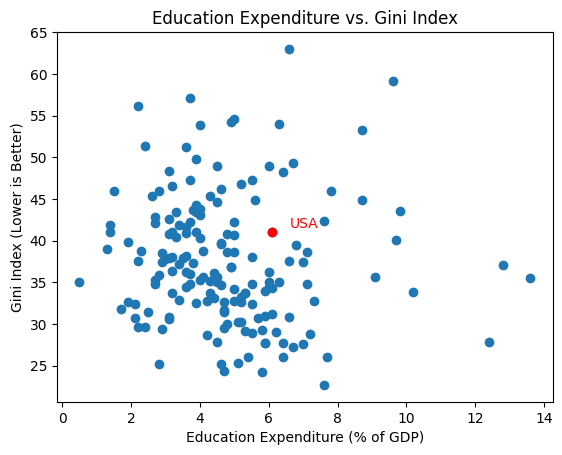

In [160]:
plt.scatter(factbook['percent_education_of_gdp'], factbook['gini_index'])
plt.xlabel('Education Expenditure (% of GDP)')
plt.ylabel('Gini Index (Lower is Better)')
plt.title('Education Expenditure vs. Gini Index')

# Annotate a specific point
x_c = factbook.loc[factbook['Country'] == 'United States', 'percent_education_of_gdp'].iloc[0]
y_c = factbook.loc[factbook['Country'] == 'United States', 'gini_index'].iloc[0]
plt.annotate('USA', xy=(x_c, y_c), xytext=(x_c + 0.5, y_c + 0.5), color='red')
plt.scatter(x_c, y_c, color='red')
#plt.savefig('C:/Users/jilli/STAT_386/my386blog/assets/images/edu_USA.png') 
plt.show(); #to remove messages/ output label

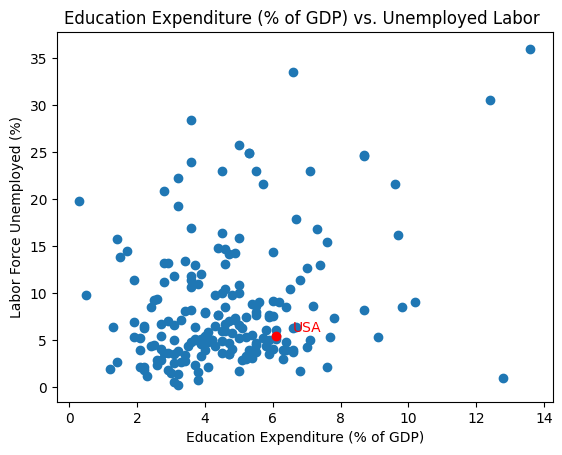

In [161]:
plt.scatter(factbook['percent_education_of_gdp'], factbook['percent_labor_force_unemployed'])
plt.xlabel('Education Expenditure (% of GDP)')
plt.ylabel('Labor Force Unemployed (%)')
plt.title('Education Expenditure (% of GDP) vs. Unemployed Labor ')

# Annotate a specific point
x_c = factbook.loc[factbook['Country'] == 'United States', 'percent_education_of_gdp'].iloc[0]
y_c = factbook.loc[factbook['Country'] == 'United States', 'percent_labor_force_unemployed'].iloc[0]
plt.annotate('USA', xy=(x_c, y_c), xytext=(x_c + 0.5, y_c + 0.5), color='red')
plt.scatter(x_c, y_c, color='red')
#plt.savefig('C:/Users/jilli/STAT_386/my386blog/assets/images/edu_labor_USA.png') 
plt.show(); #to remove messages/ output label

In [21]:
factbook.loc[
    factbook['maternal_deaths_per100Kbirths'] == factbook['maternal_deaths_per100Kbirths'].min(), 
    ('Country','Rank_m','maternal_deaths_per100Kbirths')]

,Country,Rank_m,maternal_deaths_per100Kbirths
11,Italy,182.0,2.0
23,Poland,184.0,2.0
43,Belarus,181.0,2.0
53,Norway,183.0,2.0


In [97]:
df_rank_n = df_filtered.sort_values(by='Rank_n', ascending=True)
df_rank_n[['Country', 'Rank_n','internet_users','Rank_b','broadband_users']].head(10)

,Country,Rank_n,internet_users,Rank_b,broadband_users
0,China,1.0,987000000.0,1.0,483549500.0
8,India,2.0,593400000.0,9.0,22950000.0
1,United States,3.0,301665983.0,2.0,121176000.0
3,Brazil,4.0,172173121.0,4.0,36344670.0
16,Indonesia,5.0,147702755.0,17.0,11722218.0
5,Russia,6.0,122488468.0,6.0,33893305.0
2,Japan,7.0,113252419.0,3.0,44000791.0
10,Mexico,8.0,92831582.0,11.0,21936131.0
20,Iran,9.0,75594081.0,21.0,9564195.0
4,Germany,10.0,74844784.0,5.0,36215303.0


In [98]:
df_rank_e = df_filtered.sort_values(by='Rank_e', ascending=True)
df_rank_e[['Country', 'Rank_e','percent_education_of_gdp','Rank_g','gini_index']].head(10)

,Country,Rank_e,percent_education_of_gdp,Rank_g,gini_index
205,Marshall Islands,1.0,13.6,97.0,35.5
207,Solomon Islands,2.0,12.8,82.0,37.1
212,Kiribati,3.0,12.4,162.0,27.8
172,Greenland,4.0,10.2,116.0,33.9
75,Bolivia,5.0,9.8,34.0,43.6
182,"Micronesia, Federated States of",6.0,9.7,57.0,40.1
134,Namibia,7.0,9.6,2.0,59.1
214,Sierra Leone,8.0,9.1,95.0,35.7
146,Belize,9.0,8.7,NaN,NaN
110,Botswana,10.0,8.7,9.0,53.3


In [99]:
df_rank_g = df_filtered.sort_values(by='Rank_g', ascending=False)
df_rank_g[['Country','Rank_g','gini_index','Rank_u','percent_labor_force_unemployed']].head(10)

,Country,Rank_g,gini_index,Rank_u,percent_labor_force_unemployed
144,Jersey,177.0,0.3,123.0,7.37
168,Faroe Islands,176.0,22.7,22.0,2.20
83,Slovenia,175.0,24.2,64.0,4.42
43,Belarus,174.0,24.4,69.0,4.74
62,Slovakia,173.0,25.2,113.0,6.74
94,Armenia,172.0,25.2,210.0,20.90
38,Czechia,171.0,25.3,31.0,2.89
79,Moldova,170.0,26.0,51.0,3.96
26,Ukraine,169.0,26.1,147.0,8.88
123,Iceland,168.0,26.1,92.0,5.40


In [100]:
df_rank_i = factbook.sort_values(by='Rank_i', ascending=False)
df_rank_i[['Country','Rank_i','infant_deaths_per_1K_births','Rank_m','maternal_deaths_per100Kbirths']].head(10)

,Country,Rank_i,infant_deaths_per_1K_births,Rank_m,maternal_deaths_per100Kbirths
83,Slovenia,227.0,1.51,156.0,7.0
65,Singapore,226.0,1.54,153.0,8.0
123,Iceland,225.0,1.63,173.0,4.0
165,Monaco,224.0,1.75,NaN,NaN
2,Japan,223.0,1.88,166.0,5.0
58,Finland,222.0,2.11,177.0,3.0
162,Bermuda,221.0,2.17,NaN,NaN
35,Sweden,220.0,2.28,175.0,4.0
53,Norway,219.0,2.28,183.0,2.0
38,Czechia,218.0,2.37,176.0,3.0


In [101]:
df_rank_m = factbook.sort_values(by='Rank_m', ascending=False)
df_rank_m[['Country','Rank_m','maternal_deaths_per100Kbirths','Rank_i','infant_deaths_per_1K_births']].head(10)

,Country,Rank_m,maternal_deaths_per100Kbirths,Rank_i,infant_deaths_per_1K_births
23,Poland,184.0,2.0,186.0,4.10
53,Norway,183.0,2.0,219.0,2.28
11,Italy,182.0,2.0,209.0,3.11
43,Belarus,181.0,2.0,203.0,3.23
44,United Arab Emirates,180.0,3.0,175.0,5.06
49,Israel,179.0,3.0,196.0,3.49
34,Greece,178.0,3.0,195.0,3.49
58,Finland,177.0,3.0,222.0,2.11
38,Czechia,176.0,3.0,218.0,2.37
35,Sweden,175.0,4.0,220.0,2.28


In [108]:
USA = factbook[factbook['Country'] == 'United States']
USA = USA[['Country','Rank_m','maternal_deaths_per100Kbirths','Rank_i','infant_deaths_per_1K_births',
     'Rank_e','percent_education_of_gdp','Rank_u','percent_labor_force_unemployed','Rank_g','gini_index',
     'Rank_n','internet_users','Rank_b','broadband_users']]

In [114]:
# Transpose the row to a column and rename the column
USA_col = USA.transpose().rename(index={'Rank_m':'World Rank of Maternal Deaths (per 100,000 live births)',
                                         'maternal_deaths_per100Kbirths':'Maternal Deaths (per 100,000 live births)',
                                       'Rank_i':'World Rank of Infant Deaths (per 1000 live births)',
                                       'infant_deaths_per_1K_births':'Infant Deaths (per 1000 live births)',
                                       'Rank_e':'World Rank of Education Budget (per % of the GDP)',
                                       'percent_education_of_gdp':'Education Budget (per % of the GDP)',
                                       'Rank_u':'World Rank of Unemployment (%)', 
                                       'percent_labor_force_unemployed':'Unemployment (%)',
                                       'Rank_g':'World Rank of Gini Index (lower is better)',
                                       'gini_index':'Gini Index (lower is better)',
                                       'Rank_n':'World Rank in Number of Internet Users',
                                       'internet_users':'Internet Users',
                                       'Rank_b':'World Rank in Broadband Users',
                                       'broadband_users':'Broadband Users'})

# Print the transposed column
USA_col

,1
Country,United States
"World Rank of Maternal Deaths (per 100,000 live births)",129.0
"Maternal Deaths (per 100,000 live births)",19.0
World Rank of Infant Deaths (per 1000 live births),173.0
Infant Deaths (per 1000 live births),5.12
World Rank of Education Budget (per % of the GDP),40.0
Education Budget (per % of the GDP),6.1
World Rank of Unemployment (%),95.0
Unemployment (%),5.46
World Rank of Gini Index (lower is better),50.0
